In [17]:
# Cell 1: Imports and Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.decomposition import PCA
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv("preprocessed_data.csv")

df = pd.DataFrame(data)
df = df.select_dtypes(include=['float64', 'int64']).dropna()

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

In [18]:
# Cell 2: K-Medoids Clustering
n_clusters = 3

# اختيار ميدويدز ابتدائية بشكل عشوائي (أرقام الفهارس من 0 إلى عدد العينات)
np.random.seed(42)
initial_medoids = np.random.choice(range(len(X_scaled)), size=n_clusters, replace=False).tolist()

# إنشاء النموذج وتشغيله
kmedoids_instance = kmedoids(X_scaled, initial_medoids)
kmedoids_instance.process()

# استخراج النتائج
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# إنشاء عمود جديد للعناقيد في DataFrame
labels = np.empty(len(X_scaled))
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = cluster_id
df['Cluster'] = labels.astype(int)

# عرض أول الصفوف مع العناقيد
print(df.head())

   Unnamed: 0  Category  PdDistrict         X         Y  Cluster
0           0  1.127285    0.104318 -0.202961 -0.202628        0
1           1 -0.288842    0.104318 -0.202961 -0.202628        0
2           2 -0.288842    0.104318 -0.202961 -0.202628        0
3           3 -0.288842    0.104318 -0.202961 -0.202628        0
4           4  0.146889    0.104318 -0.202961 -0.202628        0


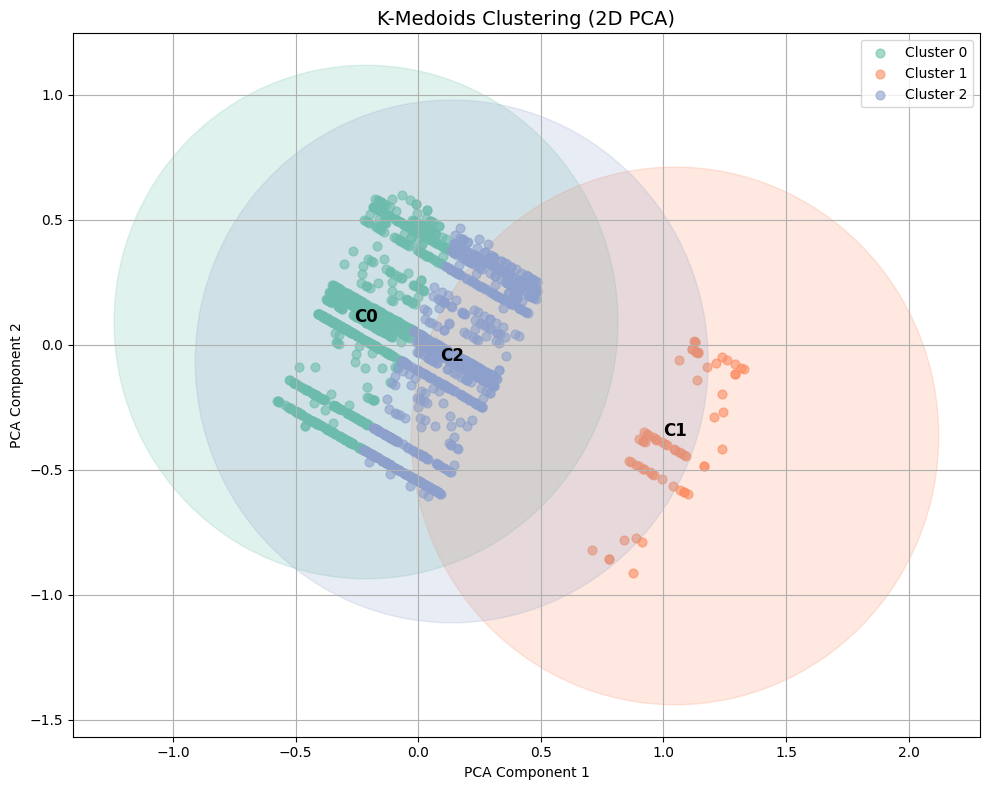

In [19]:
# Cell 3: 2D PCA Visualization with Circles
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

df['PCA1'] = X_pca_2d[:, 0]
df['PCA2'] = X_pca_2d[:, 1]

plt.figure(figsize=(10, 8))
palette = sns.color_palette("Set2", n_colors=len(df['Cluster'].unique()))

for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                label=f'Cluster {cluster}',
                s=40, alpha=0.6, c=[palette[cluster]])

    x_mean = cluster_data['PCA1'].mean()
    y_mean = cluster_data['PCA2'].mean()
    radius = np.max(np.sqrt((cluster_data['PCA1'] - x_mean)**2 + (cluster_data['PCA2'] - y_mean)**2))
    
    circle = Circle((x_mean, y_mean), radius + 0.5, color=palette[cluster], alpha=0.2)
    plt.gca().add_patch(circle)
    plt.text(x_mean, y_mean, f'C{cluster}', fontsize=12, weight='bold', ha='center')

plt.title('K-Medoids Clustering (2D PCA)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

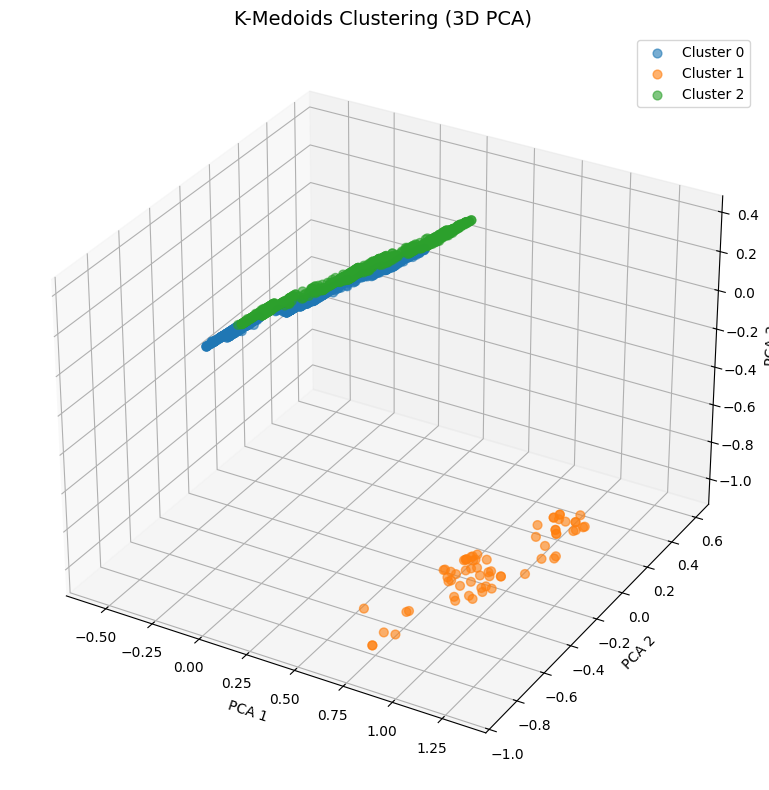

In [20]:
# Cell 4: 3D PCA Visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

df['PCA3'] = X_pca_3d[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'],
               label=f'Cluster {cluster}', alpha=0.6, s=40)

ax.set_title('K-Medoids Clustering (3D PCA)', fontsize=14)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.legend()
plt.tight_layout()
plt.show()

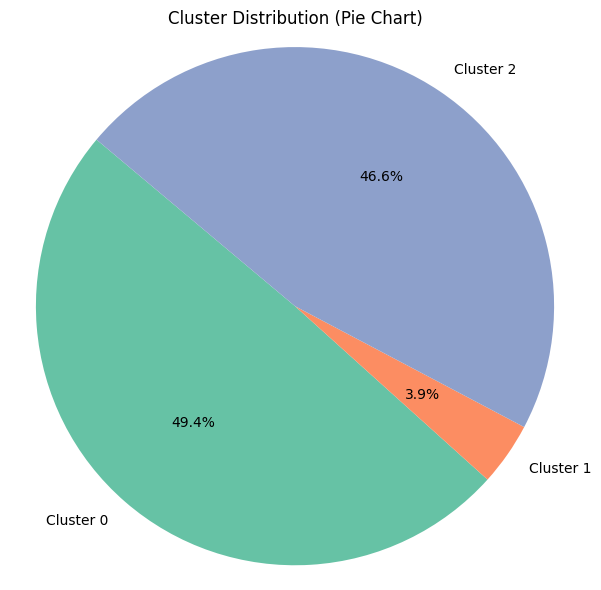

In [21]:
# 6. Pie Chart of Cluster Distribution
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(cluster_counts,
        labels=[f'Cluster {i}' for i in cluster_counts.index],
        autopct='%1.1f%%',
        colors=palette,
        startangle=140)

plt.title("Cluster Distribution (Pie Chart)")
plt.tight_layout()
plt.axis("equal")
plt.show()